<a href="https://colab.research.google.com/github/mateussdreis/datasciencecoursera/blob/master/Modelagem_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem de Dados - Bike Sharing System in Brasilia

Dataset de origem da plataforma [Kaggle](https://www.kaggle.com/datasets/joseguilhermelopes/bike-sharing-system-in-brasilia-brazil)

Vamos analisar a utilização do sistema de bicicletas compartilhadas no Plano Piloto e verificar insights com a analise desses dados.

In [29]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive # Serve para conectar a um arquivo salvo no google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# Carregamendo dos dados no python
df_rides = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto dados/introdução a python/Cópia de df_rides.csv', sep=',')
df_stations = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto dados/introdução a python/Cópia de df_stations.csv', sep=',')

In [31]:
df_rides

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0
...,...,...,...,...,...,...,...,...,...,...
287317,M,1994-01-16,DF,2018-08-31,23:11:42,23:40:20,47 - EQN 410/411,47 - EQN 410/411,28.633333,0.0
287318,M,1990-04-15,NaN,2018-08-31,23:12:02,23:40:10,47 - EQN 410/411,47 - EQN 410/411,28.133333,0.0
287319,M,1976-06-19,DF,2018-08-31,23:15:31,23:18:40,34 - Shopping Mall,22 - 102 Sul,3.150000,0.0
287320,M,1978-01-27,NaN,2018-08-31,23:20:42,23:27:01,24 - Galeria,33 - EQS 104/304,6.316667,0.0


In [32]:
# Metodo para informar dados referente as colunas do dataset (Tipo e contagem de Não Nulos)
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287322 entries, 0 to 287321
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_gender     286926 non-null  object 
 1   user_birthdate  287321 non-null  object 
 2   user_residence  107417 non-null  object 
 3   ride_date       287322 non-null  object 
 4   time_start      287322 non-null  object 
 5   time_end        244037 non-null  object 
 6   station_start   287322 non-null  object 
 7   station_end     287322 non-null  object 
 8   ride_duration   214148 non-null  float64
 9   ride_late       214148 non-null  float64
dtypes: float64(2), object(8)
memory usage: 21.9+ MB


In [33]:
# Filtrando valores não nulos nas colunas 'user_birthdate' e 'time_end'
df_rides.dropna(subset=['user_birthdate','time_end'],inplace=True)

In [34]:
# Convertendo a coluna 'user_birthdate' em 'datetime64'
df_rides['user_birthdate'] = df_rides['user_birthdate'].astype('datetime64[ns]')

# Criando a nova coluna datetime 'ride_datetime_start' concatenando 'ride_date' e 'time_start'
df_rides['ride_datetime_start'] = pd.to_datetime( df_rides['ride_date'] + ' ' + df_rides['time_start'])

# Criando a nova coluna datetime 'ride_datetime_end' concatenando 'ride_date' e 'time_end'
df_rides['ride_datetime_end'] = pd.to_datetime( df_rides['ride_date'] + ' ' + df_rides['time_end'])

# Criando a nova coluna int 'age' com subtração entre data da atual e a coluna 'user_birthdate'
df_rides['age'] = df_rides['user_birthdate'].apply(lambda x: int((datetime.datetime.now() - x).days / 365))

# Criando a nova coluna int 'hour_start' extraindo o hora da coluna datetime 'ride_datetime_start'
df_rides['hour_start'] = df_rides['ride_datetime_start'].dt.hour

# Criando a nova coluna int 'weekday' extraindo o dia da semana da coluna datetime 'ride_datetime_start'
df_rides['weekday'] = df_rides['ride_datetime_start'].dt.weekday

In [35]:
# Metodo que informa dados estatisticos sobre colunas float ou int do dataframe
df_rides.describe()

,user_birthdate,ride_duration,ride_late,ride_datetime_start,ride_datetime_end,age,hour_start,weekday
count,244036,214147.000000,214147.000000,244036,244036,244036.000000,244036.000000,244036.000000
mean,1990-01-15 23:13:14.538510720,29.915995,0.098829,2018-05-14 12:34:14.558692352,2018-05-14 12:50:35.085504256,33.822063,13.956633,2.741509
min,1928-04-08 00:00:00,3.000000,0.000000,2018-01-01 06:05:18,2018-01-01 00:20:29,-3.000000,0.000000,0.000000
25%,1984-04-01 00:00:00,8.083333,0.000000,2018-03-20 08:27:37.750000128,2018-03-20 08:13:21.249999872,27.000000,11.000000,1.000000
50%,1992-11-06 00:00:00,14.200000,0.000000,2018-05-10 15:38:07.500000,2018-05-10 15:54:57.500000,31.000000,14.000000,3.000000
75%,1996-11-22 00:00:00,33.766667,0.000000,2018-07-22 15:47:37.750000128,2018-07-22 16:51:37.249999872,40.000000,17.000000,4.000000
max,2028-04-28 00:00:00,999.600000,1.000000,2018-08-31 23:21:18,2018-08-31 23:40:20,96.000000,23.000000,6.000000
std,NaN,58.857427,0.298433,NaN,NaN,10.700472,4.162045,1.931313


## Informações Gerais do Dataset

In [36]:
# Contagem dos valores da coluna 'user_gender'
df_rides['user_gender'].value_counts()

user_gender
M    180600
F     63113
Name: count, dtype: int64

In [46]:
# Vamos criar um dataframe da contagem da coluna 'user_gender'
df_gender = pd.DataFrame(df_rides['user_gender'].value_counts().values,
             index=df_rides['user_gender'].value_counts().index,
             columns=['Count'])

df_gender

,Count
user_gender,
M,180600
F,63113


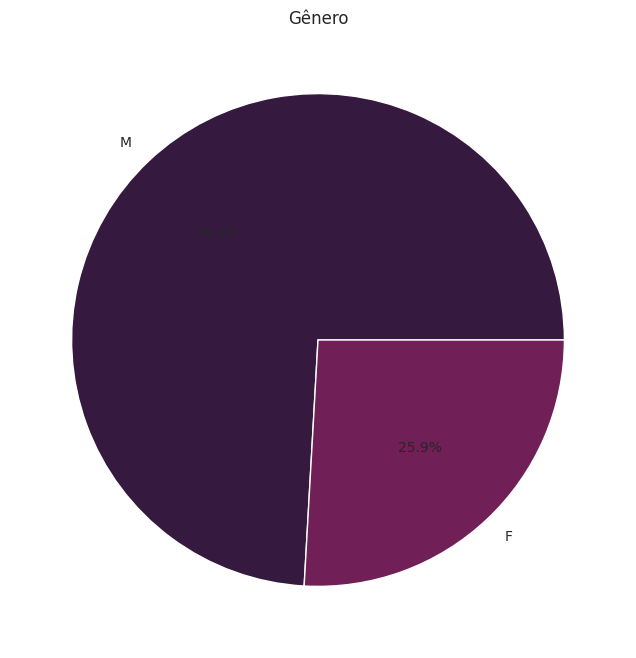

In [55]:
# Visão Piechart
plt.figure(figsize=(8,8));
sns.set_palette('rocket');
plt.title('Gênero');
plt.pie(df_gender['Count'], labels = df_gender.index, autopct='%1.1f%%');
plt.show();

Text(0.5, 1.0, 'Histograma "hour_start"')

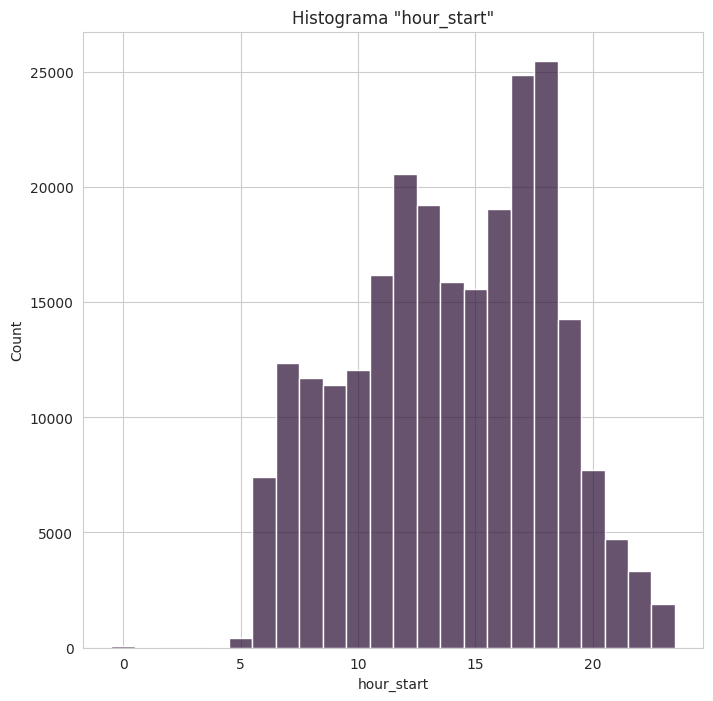

In [58]:
# Visão Histograma em valores discretos
plt.figure(figsize=(8,8));
sns.histplot(data=df_rides, x="hour_start", discrete= True);
plt.title('Histograma "hour_start"')

Text(0.5, 1.0, 'Histograma "weekday"')

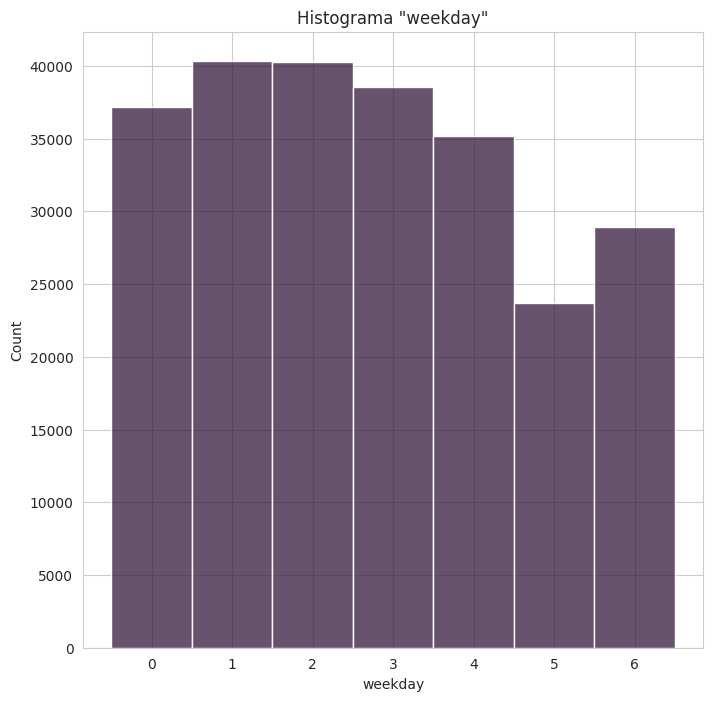

In [60]:
# Visão Histograma em valores discretos
plt.figure(figsize=(8,8))
sns.histplot(data=df_rides, x="weekday", discrete= True);
plt.title('Histograma "weekday"')

In [61]:
# Vamos criar uma tabela pivotada em duas colunas ("hour_start","weekday")
df_pivot_rides = df_rides[["hour_start","weekday",'user_gender']].groupby(["hour_start","weekday"])['user_gender'].count().unstack()

In [62]:
# Veja o resultado uma tabela pivotada, são importantes para criar mapas de calor
# sobre duas colunas do dataset
df_pivot_rides

weekday,0,1,2,3,4,5,6
hour_start,,,,,,,
0,11.0,12.0,4.0,12.0,9.0,10.0,6.0
1,NaN,NaN,NaN,1.0,3.0,1.0,2.0
4,1.0,NaN,NaN,NaN,NaN,3.0,NaN
5,62.0,79.0,91.0,83.0,77.0,1.0,3.0
6,1038.0,1351.0,1426.0,1304.0,1254.0,547.0,507.0
7,1929.0,2430.0,2429.0,2146.0,2065.0,791.0,534.0
8,1693.0,2080.0,2150.0,1780.0,1821.0,1043.0,1118.0
9,1619.0,1736.0,1860.0,1618.0,1426.0,1200.0,1938.0
10,1561.0,1738.0,1717.0,1509.0,1486.0,1459.0,2559.0


Tradução dos valores `weekday`

Segunda-Feira = 0

Terça-Feira =  1

Quarta-Feira =  2

Quinta-Feira = 3

Sexta-Feira = 4

Sábado = 5

Domingo = 6

In [63]:
# Alterar o nome das colunas para dias da semana
df_pivot_rides.columns = ['Segunda','Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']

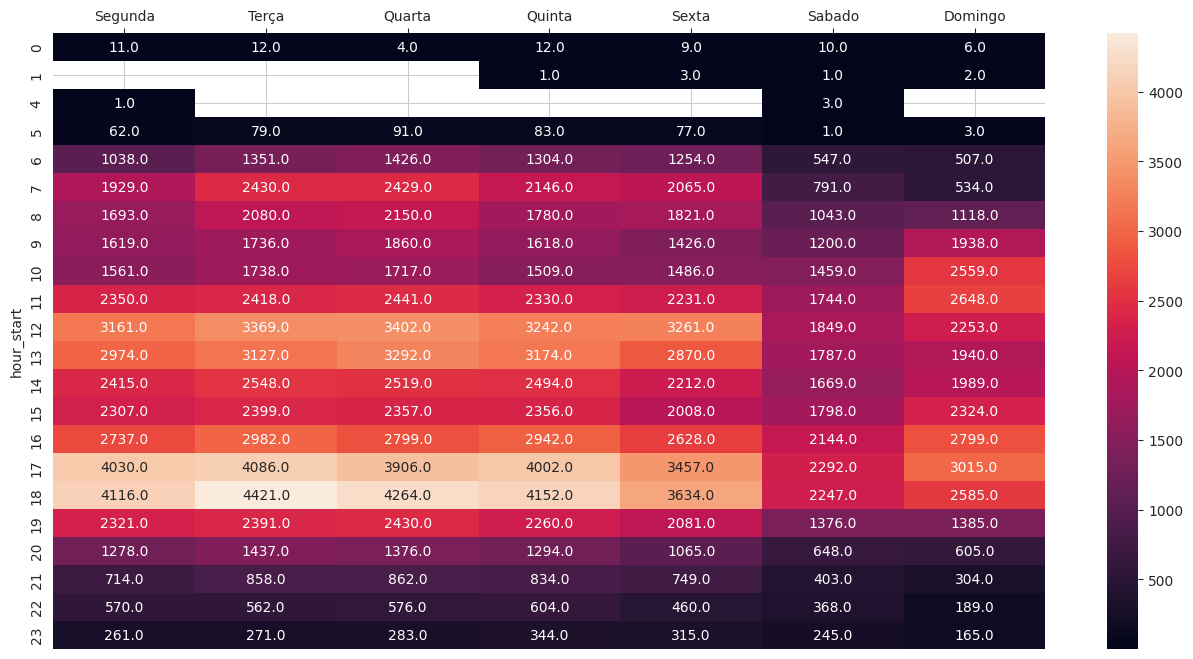

In [64]:
# ajustar o tamanho da figura
plt.figure(figsize = (16,8))
# criando a visão heatmap com a base df_pivot_rides
ax = sns.heatmap(df_pivot_rides, annot=True, fmt=".1f")
# posicionando o exio x no topo do gráfico
ax.xaxis.tick_top()

# Insights

## Dia Ideal para realizar Manutenções nas Bicicleta

In [65]:
df_pivot_rides.sum()

Segunda    37148.0
Terça      40295.0
Quarta     40184.0
Quinta     38481.0
Sexta      35112.0
Sabado     23625.0
Domingo    28868.0
dtype: float64

In [66]:
print('É possivel observar somando a quantidade de utilização que os sábados possuem o menos usuários, logo é o melhor dia para fazer a manutenção')

É possivel observar somando a quantidade de utilização que os sábados possuem o menos usuários, logo é o melhor dia para fazer a manutenção


## Queda de Utilização do serviço de dias úteis para final de semana em porcentagem

In [94]:
# Questão 2
utilizacao = pd.DataFrame(df_pivot_rides.sum())
porcentagem = ((utilizacao.iloc[[5,6]].sum() - utilizacao.sum()) / utilizacao.sum()) * 100
porcentagem = int(porcentagem.iloc[0]*(-1))
print(f'A queda de utilizadores é de {porcentagem} %.')

A queda de utilizadores é de 78 %.


## Histograma com a coluna "age".

Text(0.5, 0, 'Idade')

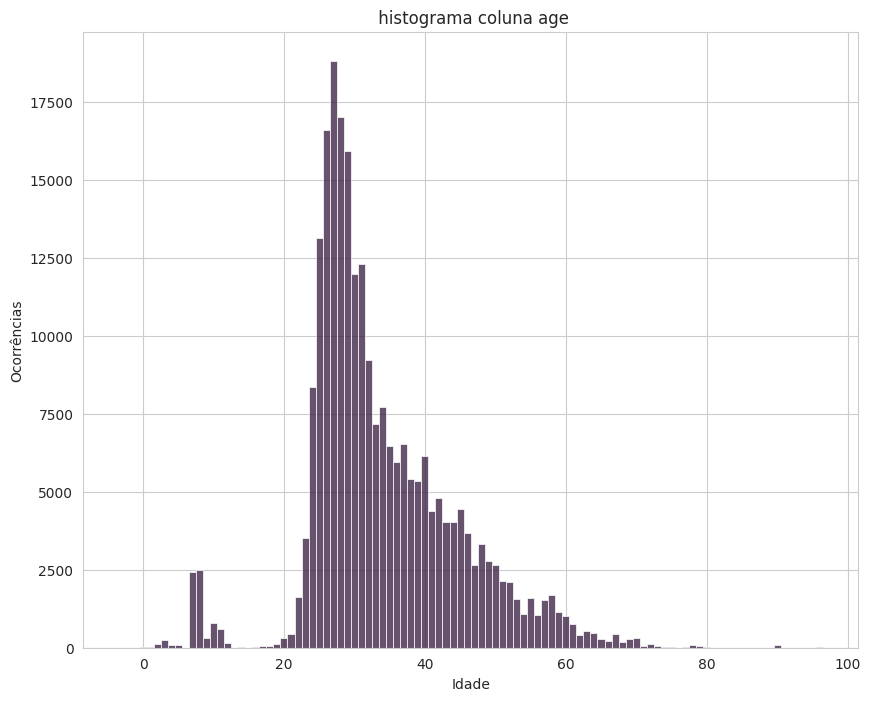

In [101]:
# Visão Histograma
plt.figure(figsize = (10,8))
sns.histplot(data=df_rides, x= 'age', discrete= True)
plt.title(" histograma coluna age")
plt.ylabel("Ocorrências")
plt.xlabel('Idade')

É possível observar nesse histograma que a maior parte dos usuários têm entre 20 e 40 anos.

## Histograma da coluna "ride_duration"

Text(0.5, 0, 'ride_duration')

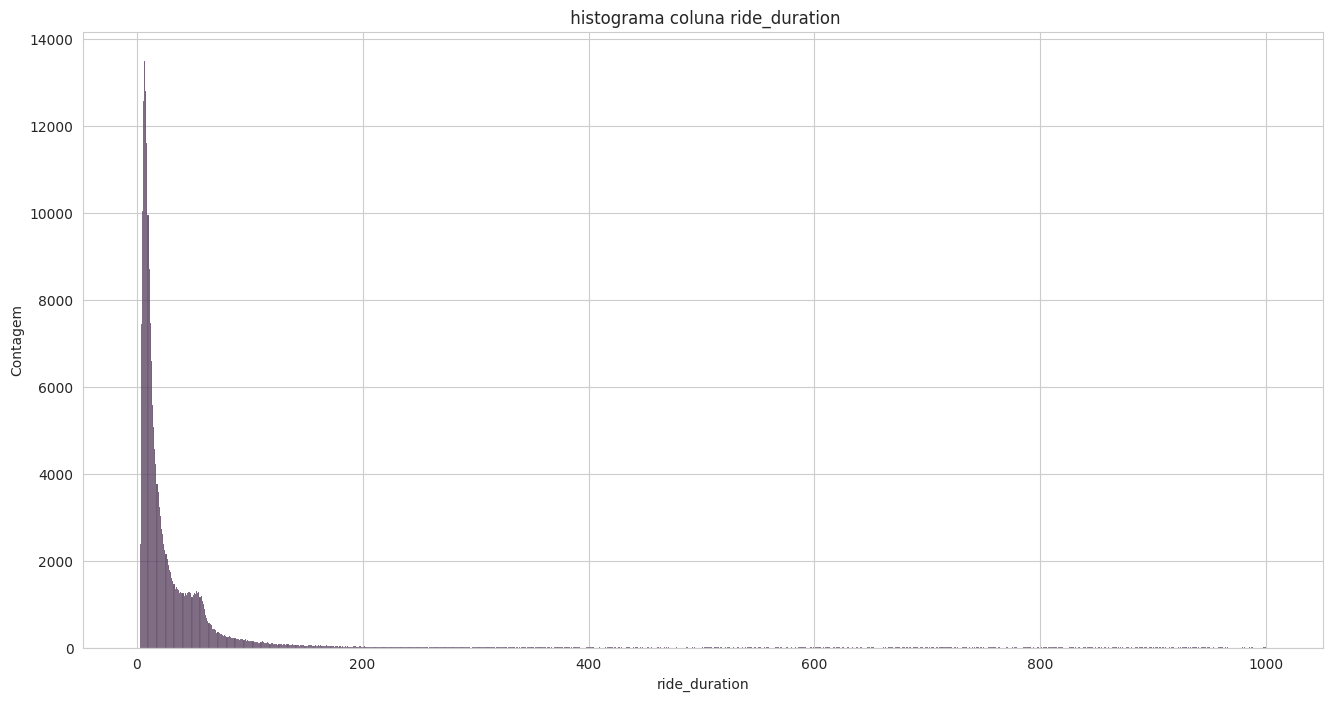

In [104]:
# Visão Histograma
plt.figure(figsize = (16,8))
sns.histplot(data=df_rides, x= 'ride_duration', discrete= True)
plt.title(" histograma coluna ride_duration")
plt.ylabel("Contagem")
plt.xlabel('ride_duration')

É possível verificar que a maior parte das corridas duram menos de 200 minutos, apesar que algumas duram mais tempo. Logo, abaixo é mostrado as corridas sem os outliers.

Text(0.5, 0, 'ride_duration')

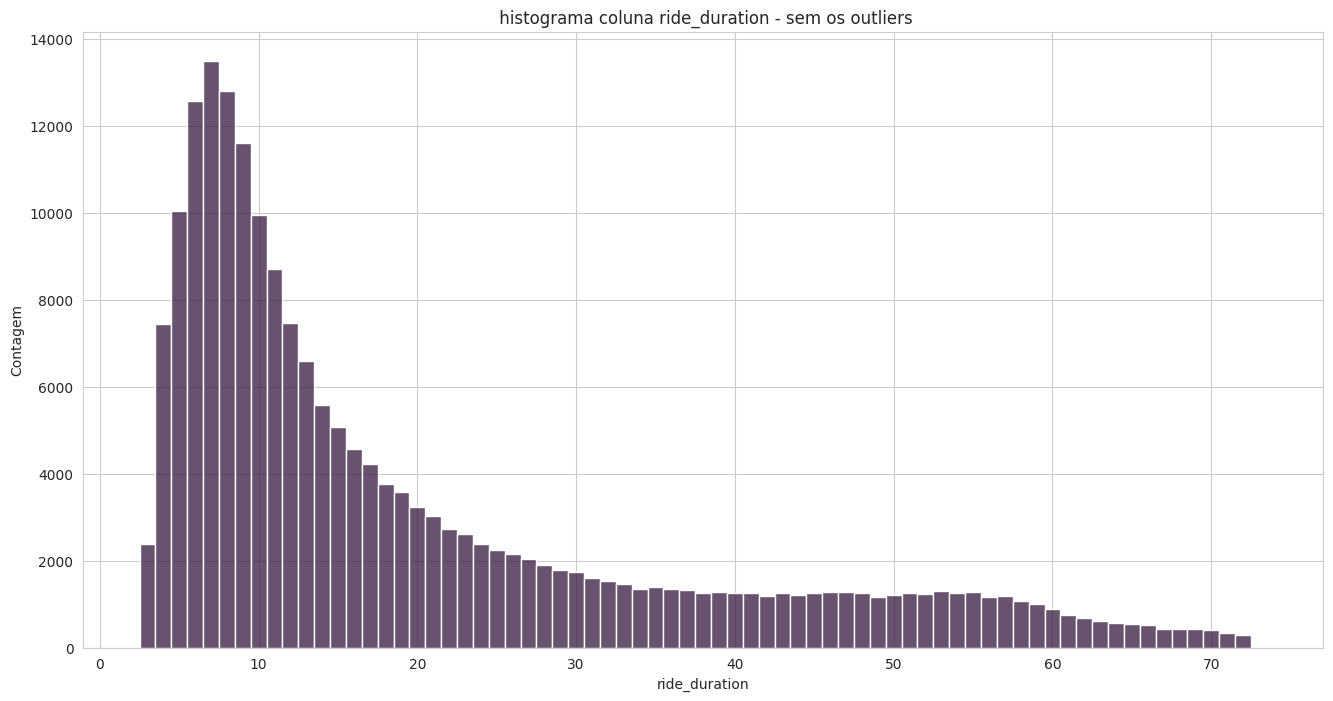

In [106]:
# Calculando o intervalo interquartil (IIQ)
Q1 = df_rides["ride_duration"].quantile(0.25)
Q3 = df_rides["ride_duration"].quantile(0.75)
IIQ = Q3 - Q1

# Definindo os limites inferior e superior para outliers
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

# Filtrando os outliers
df_filtrado = df_rides.loc[(df_rides["ride_duration"] >= limite_inferior) & (df_rides["ride_duration"] <= limite_superior)]


plt.figure(figsize = (16,8))
sns.histplot(data=df_filtrado, x= 'ride_duration', discrete= True)
plt.title(" histograma coluna ride_duration - sem os outliers")
plt.ylabel("Contagem")
plt.xlabel('ride_duration')

Agora, é possível verificar que as viagens, em grande maioria, tendem a ter menos de 10 minutos.

## Informações Sobre Rotas

Vamos verificar as 3 principais rotas de utilização do serviço, com esse tipo de informação podemos entender o comportamento do usuários do serviço, como objetivos e dificuldades.

In [107]:
# Groupby de 'station_start' e 'station_end' contando valores da coluna 'user_gender'
# Oredenado do maior para o menor.
df_rides[['station_start','station_end','user_gender']].groupby(['station_start','station_end']).count().sort_values('user_gender',ascending=False).head(15)

user_gender
station_start                   station_end                                 
15 - Brasil 21                  15 - Brasil 21                          8826
41 - Instituto de Artes         45 - Centro Olímpico                    4570
44 - ICC Sul                    45 - Centro Olímpico                    3513
45 - Centro Olímpico            44 - ICC Sul                            3402
                                41 - Instituto de Artes                 3351
39 - CLN 406                    41 - Instituto de Artes                 2363
26 - Ministério da Saude        11 - Rodoviária 2                       2016
41 - Instituto de Artes         39 - CLN 406                            1866
10 - Ministério dos Transportes 6 - Rodoviária                          1693
8 - Ministério da Defesa        6 - Rodoviária                          1580
27 - Ministério do Planejamento 6 - Rodoviária                          1486
6 - Rodoviária                  10 - Ministério dos Transportes         1453
31 - EQS 204/205                31 - EQS 204/205                        1430
11 - Rodoviária 2               26 - Ministério da Saude                1374
39 - CLN 406                    39 - CLN 406                            1370

### Análise da Rota 15 - Brasil 21 Para 15 - Brasil 21

Como a rota 15 é a rota com mais viagens, ela foi escolhida para a verificação de alguns detalhes.

In [108]:
# Filtro da rota selecionada
df_rota_1 = df_rides[(df_rides['station_start'] == '15 - Brasil 21') & (df_rides['station_end'] == '15 - Brasil 21')]

In [109]:
# Metodo que informa dados estatisticos sobre colunas float ou int do dataframe
df_rota_1[['ride_duration','age']].describe()

,ride_duration,age
count,7940.000000,8837.000000
mean,64.095118,35.526989
std,48.711549,11.442471
min,3.000000,-1.000000
25%,44.766667,28.000000
50%,55.600000,34.000000
75%,71.450000,42.000000
max,966.116667,96.000000


Text(0, 0.5, 'Quantidade de viagens')

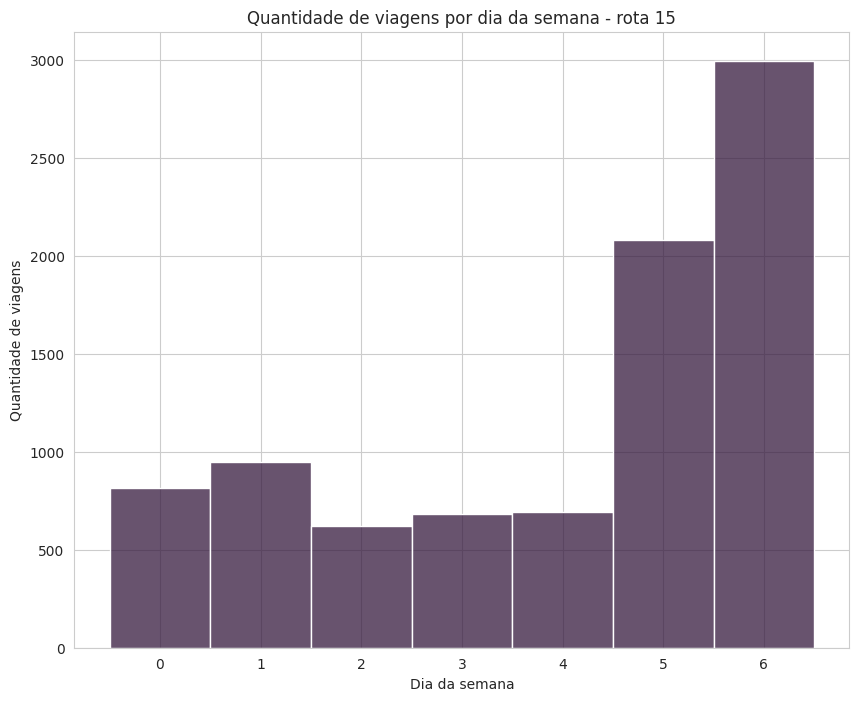

In [113]:
# Visão Histograma em valores discretos
plt.figure(figsize=(10,8))
sns.histplot(data = df_rota_1
             , x="weekday"
             , discrete= True);
plt.title('Quantidade de viagens por dia da semana - rota 15')
plt.xlabel("Dia da semana")
plt.ylabel("Quantidade de viagens")

Text(0, 0.5, 'Contagem')

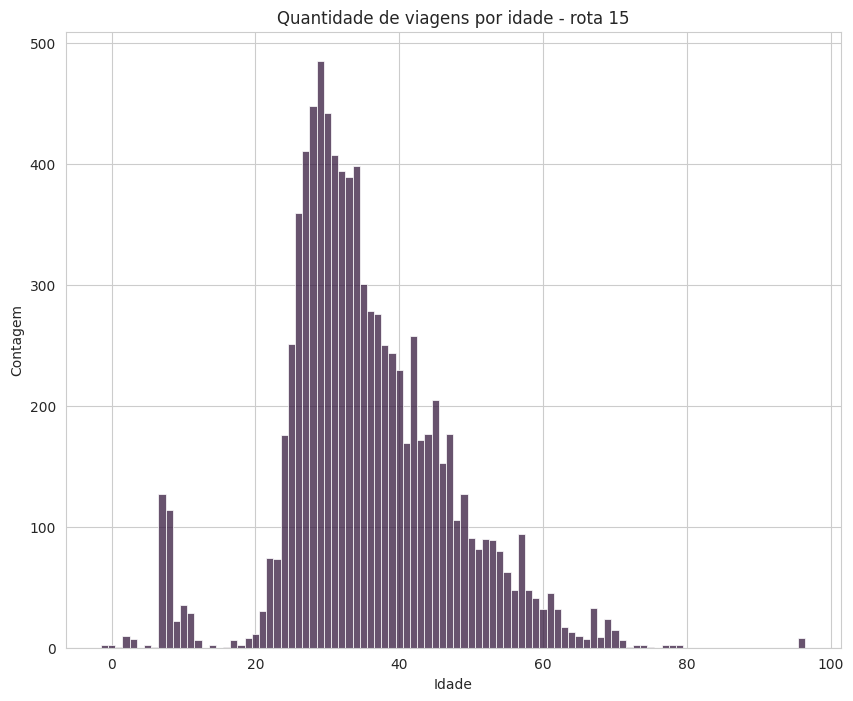

In [127]:
plt.figure(figsize=(10,8))
sns.histplot(data = df_rota_1
             , x="age"
             , discrete= True);
plt.title('Quantidade de viagens por idade - rota 15')
plt.xlabel("Idade")
plt.ylabel("Contagem")

É possível verificar que nessa rota, seus usuários são mais ativos no final de semana e que a suas idade, em grande maioria, variam no intervalo de 20 a 40 anos.

### Rota 41 - Instituto de Artes Para 45 - Centro Olímpico

In [114]:
# Filtro da rota selecionada
df_rota_2 = df_rides[(df_rides['station_start'].isin(['41 - Instituto de Artes','45 - Centro Olímpico'])) & (df_rides['station_end'].isin(['41 - Instituto de Artes','45 - Centro Olímpico']))]

In [115]:
# Metodo que informa dados estatisticos sobre colunas float ou int do dataframe
df_rota_2[['ride_duration','age']].describe()

,ride_duration,age
count,8512.000000,10007.000000
mean,21.209320,30.348056
std,45.159189,7.137122
min,3.016667,3.000000
25%,8.033333,27.000000
50%,9.750000,29.000000
75%,19.354167,31.000000
max,959.366667,79.000000


Text(0, 0.5, 'Quantidade de viagens')

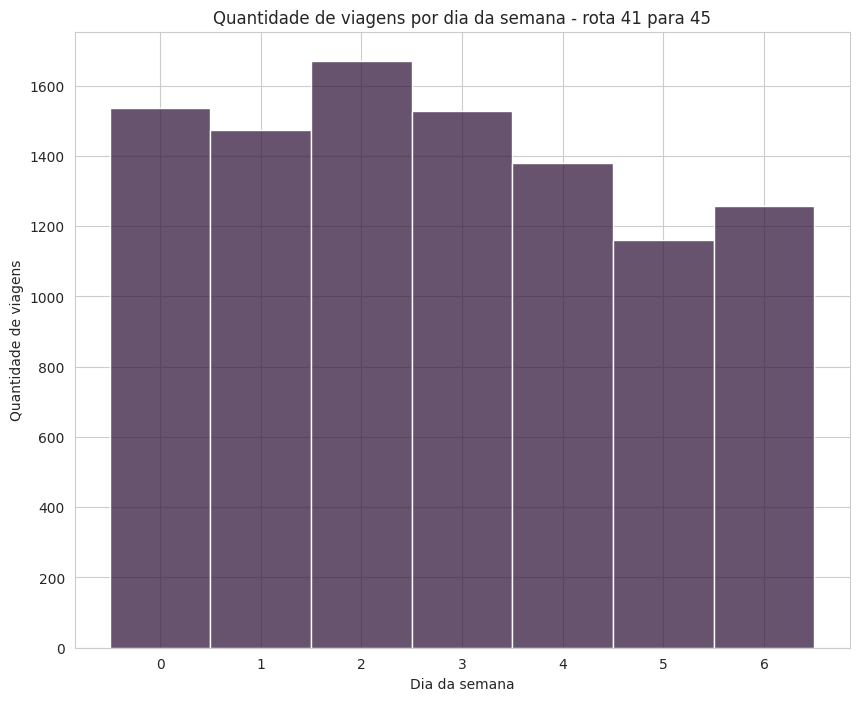

In [131]:
# Visão Histograma em valores discretos
plt.figure(figsize=(10,8))
sns.histplot(data = df_rota_2
             , x="weekday"
             , discrete= True);
plt.title('Quantidade de viagens por dia da semana - rota 41 para 45')
plt.xlabel("Dia da semana")
plt.ylabel("Quantidade de viagens")

Text(0, 0.5, 'contagem')

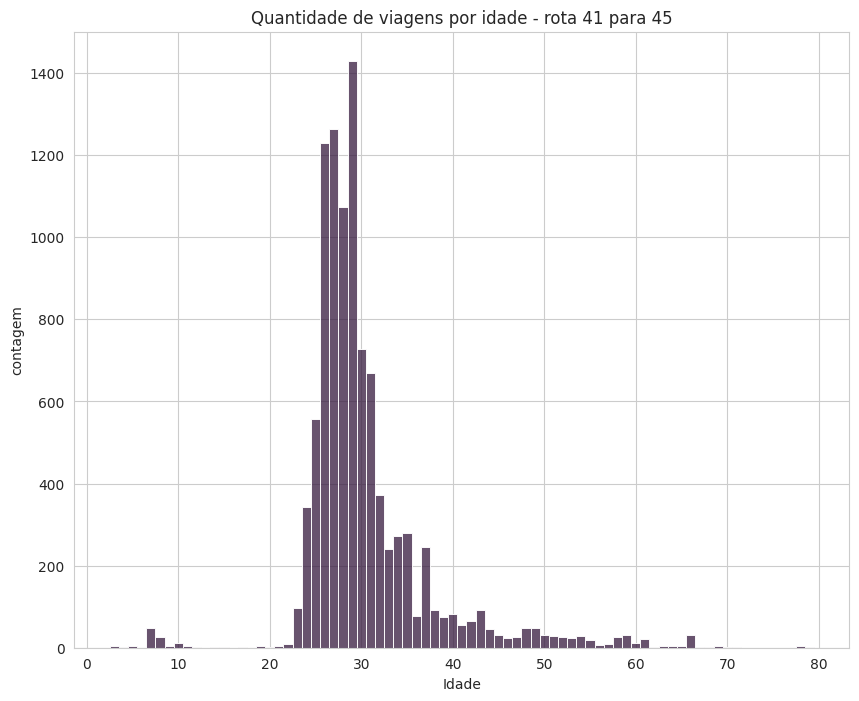

In [130]:
plt.figure(figsize=(10,8))
sns.histplot(data = df_rota_2
             , x="age"
             , discrete= True);
plt.title('Quantidade de viagens por idade - rota 41 para 45')
plt.xlabel("Idade")
plt.ylabel("contagem")

Nessa rota, é possível verificar a diminuição tanto do intervalo de idades quando no uso aos fins de semana. Logo, evidencia que essa rota é mais utilizada por jovens adultos que circulam tais locais nos dias da semana.

### Rota 26 - Ministério da Saude Para	11 - Rodoviária 2

In [117]:
# Filtro da rota selecionada
df_rota_3 = df_rides[(df_rides['station_start'].isin(['26 - Ministério da Saude','11 - Rodoviária 2'])) & (df_rides['station_end'].isin(['26 - Ministério da Saude','11 - Rodoviária 2']))]

In [118]:
# Metodo que informa dados estatisticos sobre colunas float ou int do dataframe
df_rota_3[['ride_duration','age']].describe()

,ride_duration,age
count,3970.000000,4501.000000
mean,24.887620,36.307932
std,68.051758,12.013504
min,3.000000,2.000000
25%,7.416667,27.000000
50%,9.183333,34.000000
75%,16.129167,44.000000
max,984.700000,79.000000


Text(0, 0.5, 'Quantidade de viagens')

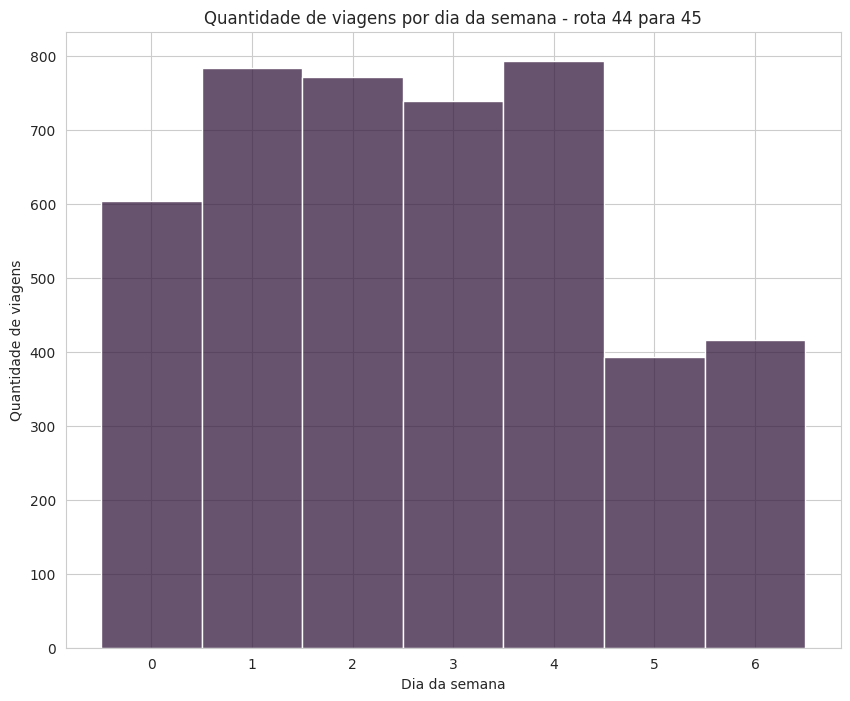

In [129]:
# Visão Histograma em valores discretos
# Visão Histograma em valores discretos
plt.figure(figsize=(10,8))
sns.histplot(data = df_rota_3
             , x="weekday"
             , discrete= True);
plt.title('Quantidade de viagens por dia da semana - rota 44 para 45')
plt.xlabel("Dia da semana")
plt.ylabel("Quantidade de viagens")

Text(0, 0.5, 'contagem')

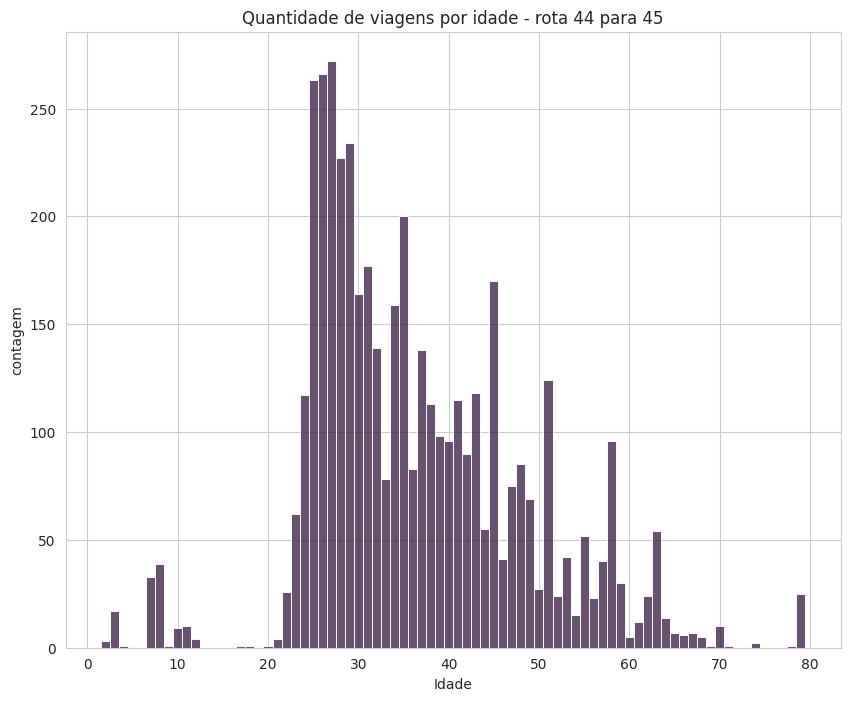

In [128]:
plt.figure(figsize=(10,8))
sns.histplot(data = df_rota_3
             , x="age"
             , discrete= True);
plt.title('Quantidade de viagens por idade - rota 44 para 45')
plt.xlabel("Idade")
plt.ylabel("contagem")

Nessa rota, é possível verificar a diminuição tanto do intervalo de idades quando no uso aos fins de semana (assim como no gráfico anterior), apesar que existe uma tendencia de as idades não serem tão diferentes entre si. Logo, evidencia também que essa rota é mais utilizada por jovens adultos que circulam tais locais nos dias da semana.